## VADER for Indeed Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [20]:
# function to print sentiments
def sentiment_scores(sentence):

    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

In [21]:
# load indeed data
df = pd.read_csv("indeed_reviews_ca.csv")
df.sample(10)

,id,title,text,rating,reviewer,location,cons,pros,datetime,reviewer_employee_type,job_work_and_life_balance_rating,compensation_and_benefits_rating,job_security_and_advancement_rating,management_rating,job_culture_rating,state,company,year,month
1733,1f83tafggu1m4800,Decent,"Pretty simple, good side job. If the riders ti...",3,Driver,"Los Angeles, CA","Puts mileage on your car, back of car getting ...","Freedom, no one to tell you what to do",2021-06-13,Current Employee,5,3,3,3,3,ca,lyft,2021,6
634,1e1ike74pf0a5803,Flexibility is the best,it doesn't pay well and income is not guarante...,5,Delivery Driver,"Sacramento, CA",NaN,NaN,2020-02-20,Current Employee,5,2,2,0,3,ca,uber,2020,2
3259,1ef11v4dm3dkl000,cool,loved to work here cause of the flexible hours...,5,Doordash Driver,"Hesperia, CA",gas,flexible,2020-08-05,Former Employee,5,5,5,5,5,ca,doordash,2020,8
133,1duvi2urhf0sh803,Driving for many different people.,I enjoy doing my job. I get a chance to drive...,5,Self Employed,"Palm Desert, CA",NaN,NaN,2020-01-19,Current Employee,5,5,5,5,5,ca,uber,2020,1
2267,1d068nq1b1d0v000,Horrible place,Someone needs to expose these companies UBER a...,1,Driver/Operator,"Los Angeles, CA",Work like a slave for no pay,None,2019-01-01,Former Employee,1,1,1,1,1,ca,lyft,2019,1
885,1dhpvfuiqb879801,Taxes,Taxes at the end of the year take a majority o...,2,Uber Driver,"Fontana, CA",NaN,NaN,2019-08-08,Current Employee,5,1,2,3,3,ca,uber,2019,8
1359,1cea0qffob812a5p,it was an experince,It was different meet alot if different peolpe...,4,Driver,"Stockton, CA",NaN,NaN,2018-05-24,Former Employee,3,3,4,4,4,ca,uber,2018,5
3610,1d2b6ranub860800,Eat as much as you want,They pay you for eating customers food if you ...,5,Driver,"San Francisco Bay Area, CA",Wasting gas mileage,Free meals,2019-01-28,Current Employee,5,5,4,5,5,ca,doordash,2019,1
2777,1ga5mqnalln2h800,Good environment,I love the work and people around that I deliv...,5,Doordash Driver,"San Francisco, CA",Tips,Tips,2022-08-11,Current Employee,5,5,5,5,5,ca,doordash,2022,8
217,1gioksoa9h21s802,Fun,No supervision since you are pretty much self ...,5,Driver,"South Gate, CA",NaN,NaN,2022-11-25,Current Employee,0,0,0,0,0,ca,uber,2022,11


In [22]:
# Instantiate the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# merge title and text
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
df['title_text'] = df.apply(lambda row: row['title'] + " " + row['text'], axis=1)

# drop empty reviews
df = df.dropna(subset=['title_text'])

# apply sentiment function
sentiment_series = df['title_text'].apply(sentiment_scores)

# merge results with original dataset
sentiment_df = pd.DataFrame(list(sentiment_series))
df = pd.concat([df, sentiment_df], axis=1)

df.sample(10)

,id,title,text,rating,reviewer,location,cons,pros,datetime,reviewer_employee_type,...,job_culture_rating,state,company,year,month,title_text,neg,neu,pos,compound
2514,1ghcntrd3hbh5800,Good,good support team and good customers the payou...,5,Instacart Shopper,"Santa Rosa, CA",Expect everyone to be fast shoppers even in ne...,Freeing,2022-11-08,Current Employee,...,5,ca,instacart,2022,11,Good good support team and good customers the ...,0.000,0.627,0.373,0.9231
3229,1ej0fri9fu1dj800,Flexible scheduling,Work anytime its just hard finding the right c...,3,Dasher,"Los Angeles, CA",Travel,Flexible,2020-09-24,Current Employee,...,5,ca,doordash,2020,9,Flexible scheduling Work anytime its just hard...,0.039,0.909,0.052,0.1280
443,1ekdm73meo2hc800,Good until you find a career,Great side husle to do while you find a job/ca...,2,Driver,"Los Angeles, CA",NaN,NaN,2020-10-12,Former Employee,...,2,ca,uber,2020,10,Good until you find a career Great side husle ...,0.000,0.813,0.187,0.8479
1908,1dvc5irg44rtb803,"Earn as much as you like, when you like","As a driver for Lyft, no two days are alike. ...",5,DRIVER,"San Francisco, CA",No benefits,Schedule flexibility,2020-01-24,Current Employee,...,3,ca,lyft,2020,1,"Earn as much as you like, when you like As a d...",0.090,0.649,0.261,0.9622
317,1fjelljdooc9d800,Little to no driver support,Lol Uber’s support well that’s what it’s calle...,2,Uber Driver,"Corona, CA","Verbal maps not visual, lack of driver support",Meeting many new people,2021-11-01,Current Employee,...,1,ca,uber,2021,11,Little to no driver support Lol Uber’s suppor...,0.129,0.674,0.197,0.7517
3611,1d29g2cmgbrdr800,Work at your own pace set your own schedules,"DoorDash is a restaurant to residence, 1099 co...",3,Delivery Driver,"Orange County, CA","Low pay. Possible car maintenance, App issues","Flexible Scheduling, Independent Work, Great s...",2019-01-27,Current Employee,...,3,ca,doordash,2019,1,Work at your own pace set your own schedules D...,0.075,0.887,0.039,-0.7430
1169,1ct2quh4t1d0h000,Flexible hours and location of work..,Need more income and less hours of work. Stead...,3,Driver partner,"Sacramento, CA",NaN,Flexible hours,2018-11-24,Current Employee,...,2,ca,uber,2018,11,Flexible hours and location of work.. Need mor...,0.000,0.700,0.300,0.9136
390,1f34j3tmb309g000,Freedom,Most of the time I have to research this compa...,4,Delivery Driver,"Orange County, CA",There are sometimes GPS mistakes to the. Locat...,"Freedom, pay and benefits.",2021-04-12,Current Employee,...,4,ca,uber,2021,4,Freedom Most of the time I have to research th...,0.028,0.593,0.380,0.9725
3254,1efn3me2lol7u800,"You can start and end when you want, but you d...",I love DoorDashing it’s a great side job. You ...,5,Driver,"Livermore, CA",NaN,NaN,2020-08-14,Current Employee,...,5,ca,doordash,2020,8,"You can start and end when you want, but you d...",0.065,0.763,0.172,0.8957
2126,1deaetf46h3p9800,Not employment. You are an independent contractor,"As such, you get little benefits from lyft. We...",3,Driver,"Seal Beach, CA",NaN,NaN,2019-06-26,Former Employee,...,1,ca,lyft,2019,6,Not employment. You are an independent contrac...,0.059,0.887,0.054,0.1403


<Axes: xlabel='year,month'>

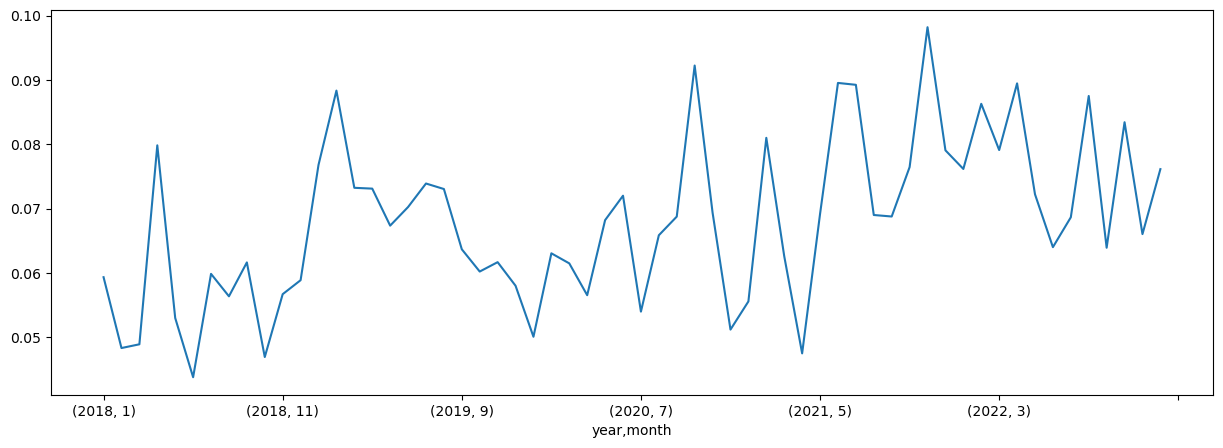

In [23]:
col = "neg"
df.groupby(["year", "month"])[col].mean().plot( figsize=(15, 5))

<Axes: xlabel='year,month'>

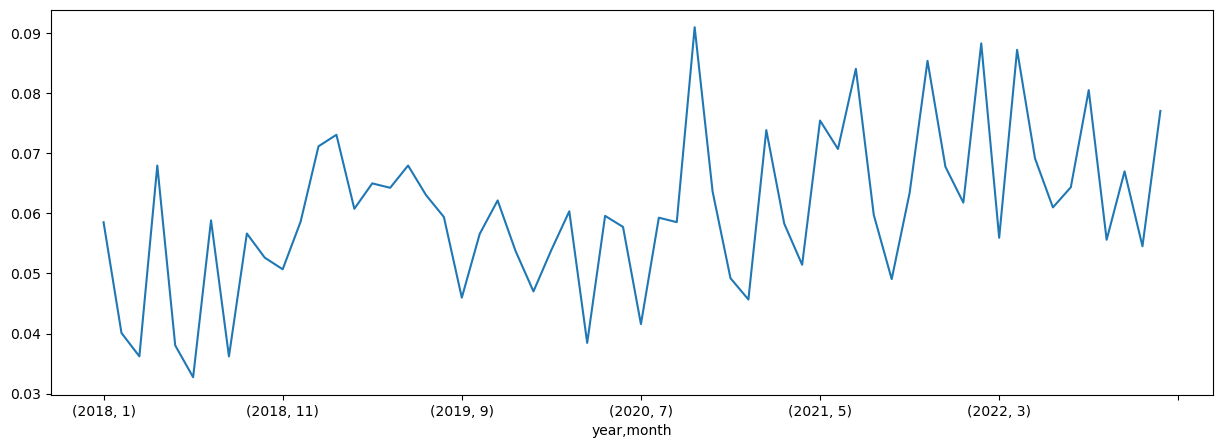

In [25]:
col = "neg"
df[df['reviewer_employee_type'] == 'Current Employee'].groupby(["year", "month"])[col].mean().plot( figsize=(15, 5))

<Axes: xlabel='year,month'>

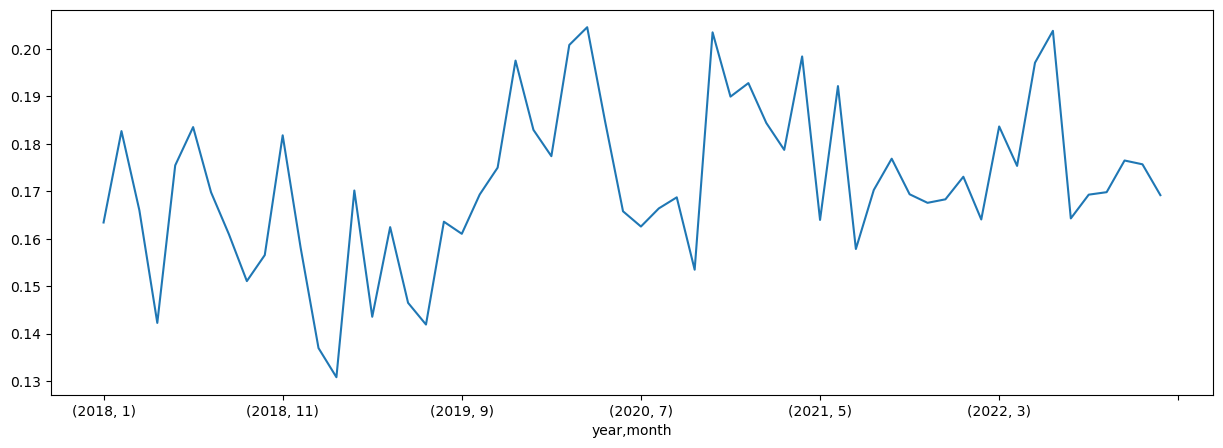

In [24]:
col = "pos"
df.groupby(["year", "month"])[col].mean().plot( figsize=(15, 5))

<Axes: xlabel='year,month'>

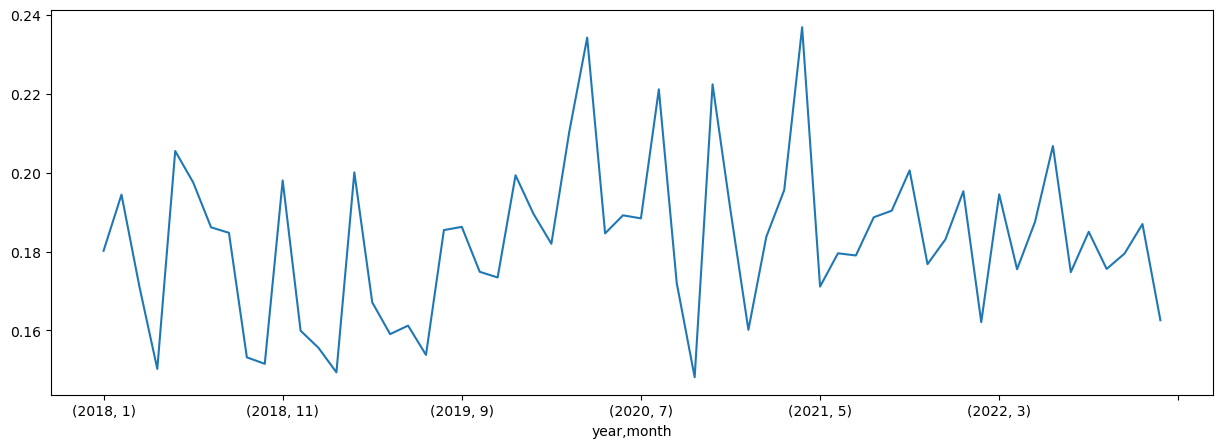

In [26]:
col = "pos"
df[df['reviewer_employee_type'] == 'Current Employee'].groupby(["year", "month"])[col].mean().plot( figsize=(15, 5))

<Axes: xlabel='year,month'>

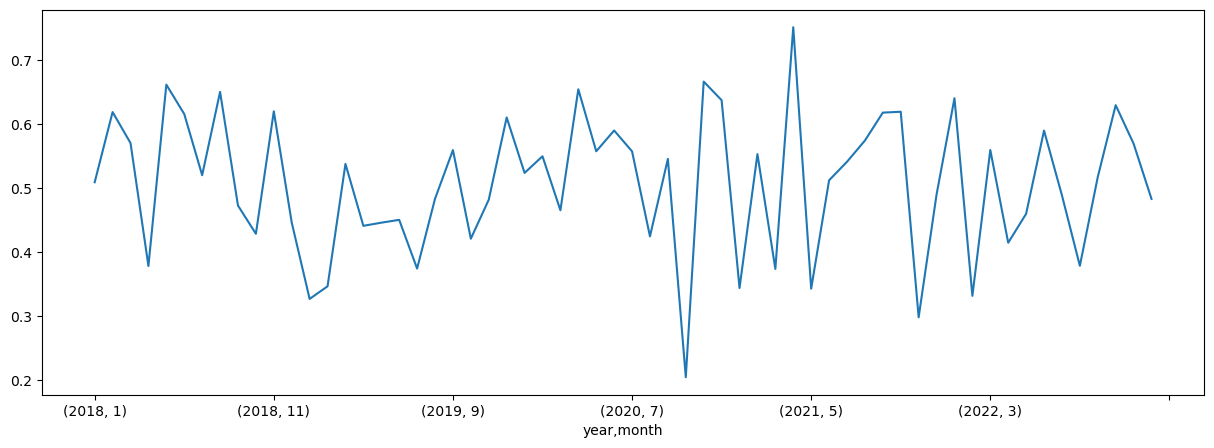

In [27]:
col = "compound"
df[df['reviewer_employee_type'] == 'Current Employee'].groupby(["year", "month"])[col].mean().plot( figsize=(15, 5))

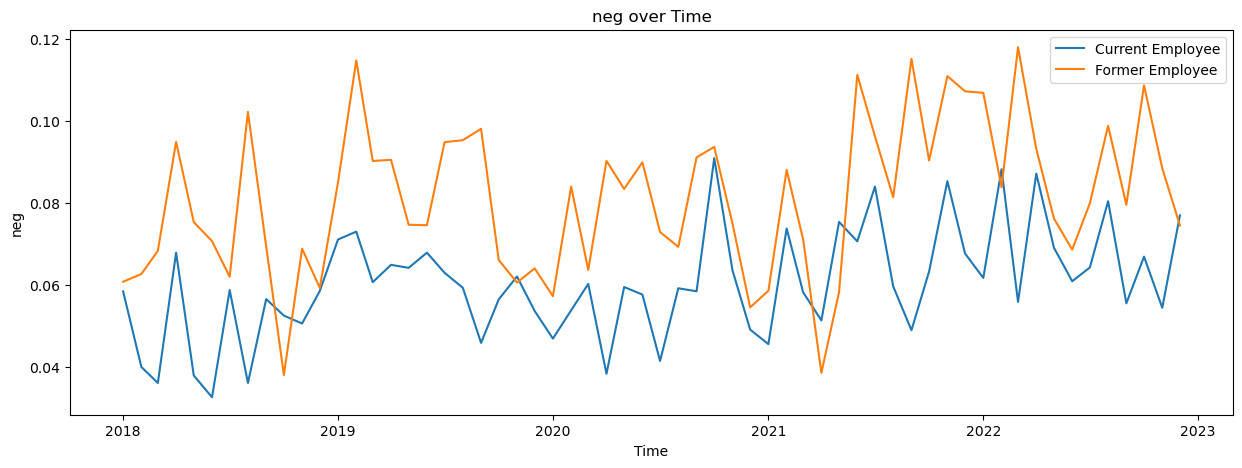

In [34]:
col = 'neg'

# Create two separate dataframes
current_df = df[df['reviewer_employee_type'] == 'Current Employee']
former_df = df[df['reviewer_employee_type'] == 'Former Employee']

# Group by year and month and calculate the mean
current_grouped = current_df.groupby(["year", "month"])[col].mean().reset_index()
former_grouped = former_df.groupby(["year", "month"])[col].mean().reset_index()

# Create a datetime index
current_grouped['date'] = pd.to_datetime(current_grouped[['year', 'month']].assign(day=1))
former_grouped['date'] = pd.to_datetime(former_grouped[['year', 'month']].assign(day=1))

# Set 'date' as index
current_grouped.set_index('date', inplace=True)
former_grouped.set_index('date', inplace=True)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(current_grouped[col], label='Current Employee')
plt.plot(former_grouped[col], label='Former Employee')

plt.xlabel('Time')
plt.ylabel(col)
plt.title(f'{col} over Time')
plt.legend()
plt.show()


In [37]:
df_2022_current = df[(df['year'] == 2022) & (df['reviewer_employee_type'] == 'Current Employee')]

results = df_2022_current.groupby('month')[['neg', 'pos']].agg(['count', 'mean'])
print(results)

        neg             pos          
      count      mean count      mean
month                                
1        30  0.061800    30  0.195267
2        32  0.088313    32  0.162125
3        37  0.055946    37  0.194486
4        39  0.087231    39  0.175513
5        36  0.069167    36  0.187500
6        33  0.061000    33  0.206727
7        45  0.064356    45  0.174778
8        44  0.080523    44  0.185000
9        36  0.055611    36  0.175583
10       37  0.067000    37  0.179486
11       45  0.054533    45  0.186956
12       33  0.077061    33  0.162606
